## Import Libraries

In [1]:
import sys
sys.path.insert(1, '../scripts')
import extended_model
import analysis_helper
import importlib
import glob
import json
importlib.reload(extended_model)
importlib.reload(analysis_helper)

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import numpy as np
import bisect
import itertools

from functools import reduce
from operator import mul
from scipy.stats import norm
import random
from math import comb

import multiprocessing as mp

from tqdm import tqdm
from distinctipy import get_colors

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

## 4 Beliefs

In [2]:
pool = mp.Pool(processes=32)

simulation_count = 100
n_nodes = 4
N = 300
p = .2
params = [*zip([*range(simulation_count)], [n_nodes]*simulation_count, [N]*simulation_count, [p]*simulation_count)]

results = pool.starmap(extended_model.simulate_rewiring, params)
graphs = [r[1] for r in results]
results = {sim_no:track for sim_no,track in [r[0] for r in results]}

  0%|          | 0/6912001 [00:00<?, ?it/s]

## Analysis of One Simulation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


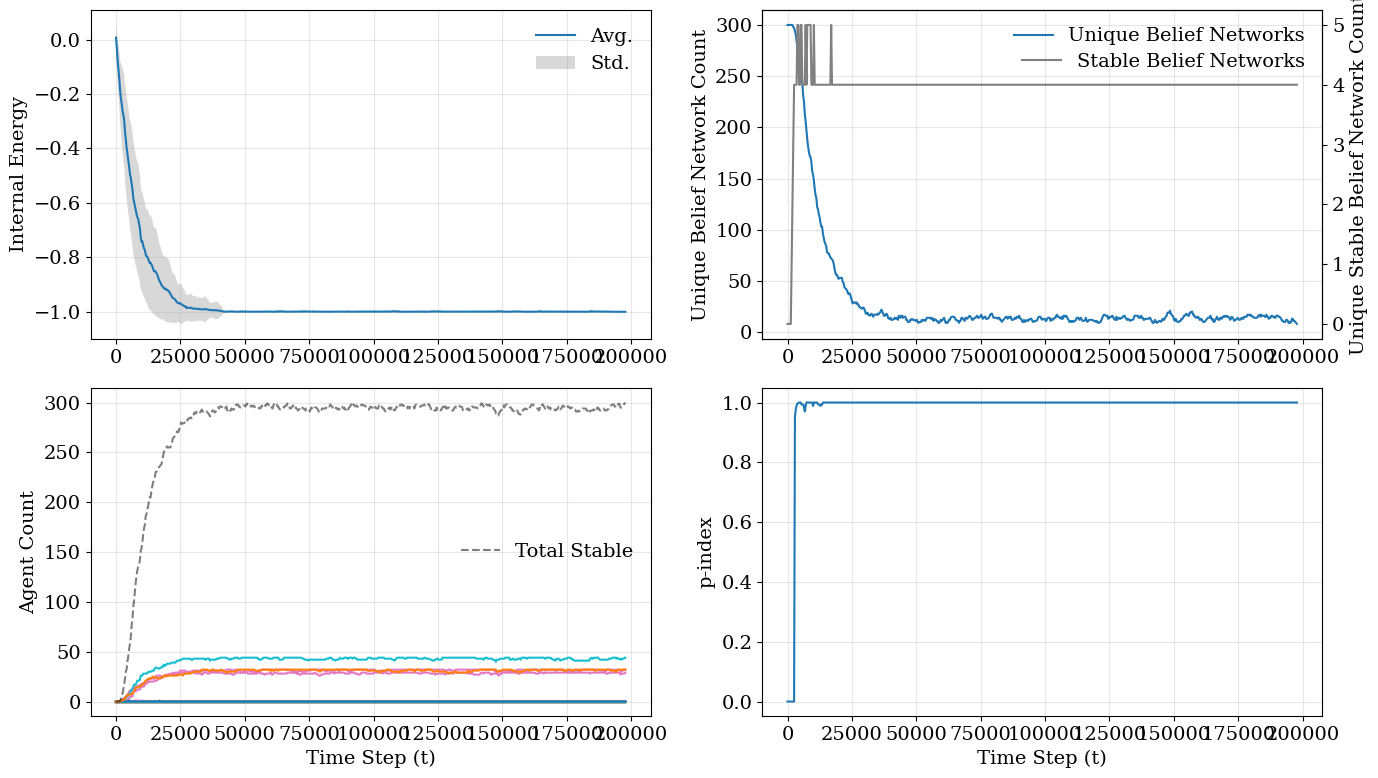

In [5]:
i = 0
track = results[i]
analysis_helper.overall_analysis(n_nodes, track, folder='increase_node_count', i=i, save=False)